# Import, clean, scale

In [12]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

In [13]:
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:
df = pd.read_csv('cs136.csv')
df = df.drop(['Unnamed: 0', 'added','live', 'dur', 'pop', 'year'], axis=1)
df = df.dropna()
df = df.reset_index(drop=True)

In [15]:
print(df)

                              title        artist                 top genre  \
0     Calm Down (with Selena Gomez)          Rema                 afrobeats   
1                           Perfect    Ed Sheeran                       pop   
2                    No Role Modelz       J. Cole         conscious hip hop   
3                       El Merengue    Marshmello                   brostep   
4                  Watermelon Sugar  Harry Styles                       pop   
...                             ...           ...                       ...   
1353              Caught in a Dream         Tesla                album rock   
1354                       Tandtråd      Tjuvjakt           swedish hip hop   
1355                     Better Off     Hendersin             indie pop rap   
1356                    On Your Own  Justin Stone  deep underground hip hop   
1357                   Girl From LA        Franke          social media pop   

      bpm  Energy  Dance  dB  val  acous  spch  
0 

In [16]:
df['top genre'] = df['top genre'].astype(str)

In [17]:
print(df['top genre'].isna().sum())

0


In [18]:
# create a new column called 'outer genre'
df['outer genre'] = df['top genre']

In [19]:
# replace any genre that contains the word 'pop' with 'pop'
genres = ['pop', 'hip hop', 'rap', 'rock', 'metal', 'classical', 'soul', 'reggae', 'dance', 'indie', 'house', 'r&b', 'edm']
for x in genres:
    df.loc[df['top genre'].str.contains(x), 'outer genre'] = x

In [20]:
print(df['outer genre'].isna().sum())

0


In [21]:
genre_counts = df['outer genre'].value_counts()

# select the rows where the count of the corresponding genre is greater than 1
df = df[df['outer genre'].isin(genre_counts[genre_counts > 10].index)].reset_index(drop=True)

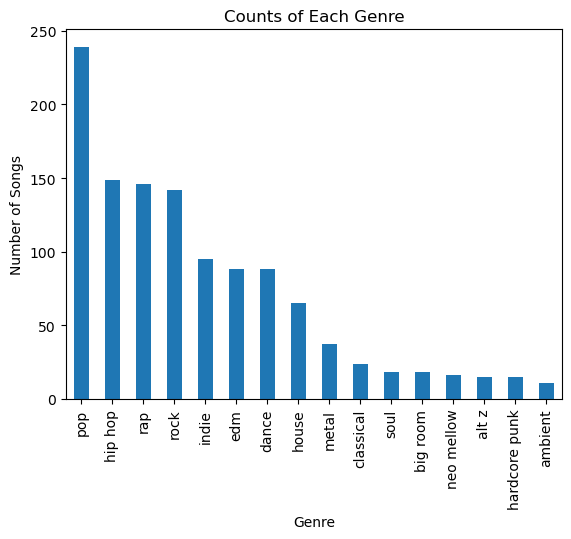

In [22]:
genre_counts = df['outer genre'].value_counts()
genre_counts.plot(kind='bar')
# set the x-axis label and title
plt.xlabel('Genre')
plt.ylabel('Number of Songs')
plt.title('Counts of Each Genre')

# display the plot
plt.show()

In [23]:
print(df.columns)
print(df.shape)

Index(['title', 'artist', 'top genre', 'bpm', 'Energy', 'Dance', 'dB', 'val',
       'acous', 'spch', 'outer genre'],
      dtype='object')
(1166, 11)


In [24]:
print(df)

                  title           artist                 top genre  bpm  \
0               Perfect       Ed Sheeran                       pop   95   
1        No Role Modelz          J. Cole         conscious hip hop  100   
2      Watermelon Sugar     Harry Styles                       pop   95   
3              Believer  Imagine Dragons               modern rock  125   
4            Wake Me Up           Avicii                       edm  124   
...                 ...              ...                       ...  ...   
1161  Caught in a Dream            Tesla                album rock  152   
1162           Tandtråd         Tjuvjakt           swedish hip hop  138   
1163         Better Off        Hendersin             indie pop rap  105   
1164        On Your Own     Justin Stone  deep underground hip hop   90   
1165       Girl From LA           Franke          social media pop   90   

      Energy  Dance  dB  val  acous  spch outer genre  
0         45     60  -6   17     16     2  

In [25]:
X = df.iloc[:, 3:10].dropna().values
print(X)
print(X.shape)

[[ 95  45  60 ...  17  16   2]
 [100  52  69 ...  49  32  34]
 [ 95  82  55 ...  56  12   5]
 ...
 [105  79  81 ...  46  19   9]
 [ 90  56  62 ...  14  25  22]
 [ 90  80  68 ...  47  18   9]]
(1166, 7)


In [26]:
# Create a StandardScaler object and fit it to the data
scaler = StandardScaler()
scaler.fit(X)

# Transform the data using the scaler
X_normalized = scaler.transform(X)
print(X_normalized)

[[-0.94067777 -1.01044311 -0.14547626 ... -1.34066101 -0.22665098
  -0.79798385]
 [-0.76043221 -0.66888605  0.41148392 ...  0.02481215  0.3843013
   2.50111571]
 [-0.94067777  0.7949299  -0.45489858 ...  0.3235094  -0.37938905
  -0.48869327]
 ...
 [-0.58018665  0.6485483   1.15409748 ... -0.10320096 -0.11209743
  -0.07630582]
 [-1.12092333 -0.47371059 -0.02170733 ... -1.46867412  0.11700968
   1.26395337]
 [-1.12092333  0.69734217  0.34959945 ... -0.06052993 -0.15028195
  -0.07630582]]


In [27]:
x_train, x_test = train_test_split(X_normalized, test_size=0.3, random_state=1)

# Test batches

In [28]:
batches = [49, 100, 256, 512, 1024]

In [29]:
import time
import matplotlib.pyplot as plt

In [30]:
times = []
costs = []

for k in range(1,100):
    best_cost = -np.inf
    best_batch = 0
    lowest_time = np.inf
    
    batch_times = []
    batch_scores = []
    for batch in batches:
        # start timer
        start_time = time.time()
        
        # fit model to train set
        model = MiniBatchKMeans(n_clusters=k, n_init=10, max_iter=300, batch_size=batch, random_state=1).fit(x_train)
        
        # end timer and append time
        end_time = time.time()
        runtime = end_time - start_time
        batch_times.append(runtime)
        
        # calculate cost
        cost = model.score(x_test)
        batch_scores.append(cost)
        
        if runtime < lowest_time:
            lowest_time = runtime
            best_batch = batch
            
    times.append(batch_times) 
    costs.append(batch_scores)
        

In [31]:
mb_costs = np.array(costs)
mb_costs_T = mb_costs.T
print(mb_costs_T.shape)

(5, 99)


In [32]:
mb_times = np.array(times)
mb_times_T = mb_times.T

In [33]:
print(f"for batch size {batches[0]}, best cost was {np.max(mb_costs_T[0])} at {np.argmax(mb_costs_T[0])+1} clusters and took {mb_times_T[0][np.argmax(mb_costs_T[0])]} seconds")
print(f"for batch size {batches[1]}, best cost was {np.max(mb_costs_T[1])} at {np.argmax(mb_costs_T[1])+1} clusters and took {mb_times_T[1][np.argmax(mb_costs_T[1])]} seconds")
print(f"for batch size {batches[2]}, best cost was {np.max(mb_costs_T[2])} at {np.argmax(mb_costs_T[2])+1} clusters and took {mb_times_T[2][np.argmax(mb_costs_T[2])]} seconds")
print(f"for batch size {batches[3]}, best cost was {np.max(mb_costs_T[3])} at {np.argmax(mb_costs_T[3])+1} clusters and took {mb_times_T[3][np.argmax(mb_costs_T[3])]} seconds")
print(f"for batch size {batches[4]}, best cost was {np.max(mb_costs_T[4])} at {np.argmax(mb_costs_T[4])+1} clusters and took {mb_times_T[4][np.argmax(mb_costs_T[4])]} seconds")

for batch size 49, best cost was -432.95017743681376 at 99 clusters and took 0.08673787117004395 seconds
for batch size 100, best cost was -435.1250506801124 at 99 clusters and took 0.0910649299621582 seconds
for batch size 256, best cost was -428.59302051356633 at 99 clusters and took 0.13478708267211914 seconds
for batch size 512, best cost was -432.2072472987112 at 94 clusters and took 0.13198614120483398 seconds
for batch size 1024, best cost was -419.30196710375805 at 93 clusters and took 0.12807679176330566 seconds


In [34]:
batch_49 = []
batch_100 = []
batch_256 = []
batch_512 = []
batch_1024 = []
for k in range(99):
    batch_49.append(times[k][0])
    batch_100.append(times[k][1])
    batch_256.append(times[k][2])
    batch_512.append(times[k][3])
    batch_1024.append(times[k][4])

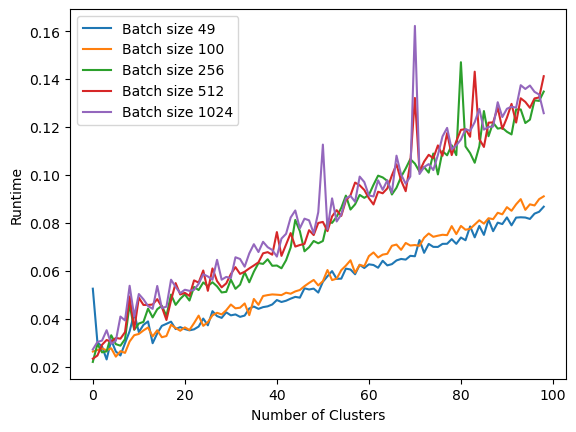

In [35]:
plt.plot(batch_49, label="Batch size 49")
plt.plot(batch_100, label="Batch size 100")
plt.plot(batch_256, label="Batch size 256")
plt.plot(batch_512, label="Batch size 512")
plt.plot(batch_1024, label="Batch size 1024")
plt.xlabel("Number of Clusters")
plt.ylabel("Runtime")
plt.legend()

In [36]:
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score

In [37]:
best_k = 0
best_cost = -np.inf
kmeans_times = []
time_for_best_model = None

costs = []
distortions = []

for k in range(1, 101):
    start_time = time.time()
    
    model = KMeans(n_clusters=k, n_init=10, random_state=1).fit(x_train)
    
    end_time = time.time()
    runtime = end_time - start_time
    kmeans_times.append(runtime)
    
    cost = model.score(x_test)
    costs.append(cost)
    distortions.append(model.inertia_)
    
    if cost > best_cost:
        best_cost = cost
        best_k = k
        time_for_best_model = runtime
        
print(best_k)
print(best_cost)
print(time_for_best_model)

95
-427.8100212929876
0.1389162540435791


In [38]:
print(f"Batch size = {batches[0]}:\tbest cost of {-np.max(mb_costs_T[0]):.2f}\tw/ {np.argmax(mb_costs_T[0])+1} clusters\ttook {mb_times_T[0][np.argmax(mb_costs_T[0])]:.3f} seconds")
print(f"Batch size = {batches[1]}:\tbest cost of {-np.max(mb_costs_T[1]):.2f}\tw/ {np.argmax(mb_costs_T[1])+1} clusters\ttook {mb_times_T[1][np.argmax(mb_costs_T[1])]:.3f} seconds")
print(f"Batch size = {batches[2]}:\tbest cost of {-np.max(mb_costs_T[2]):.2f}\tw/ {np.argmax(mb_costs_T[2])+1} clusters\ttook {mb_times_T[2][np.argmax(mb_costs_T[2])]:.3f} seconds")
print(f"Batch size = {batches[3]}:\tbest cost of {-np.max(mb_costs_T[3]):.2f}\tw/ {np.argmax(mb_costs_T[3])+1} clusters\ttook {mb_times_T[3][np.argmax(mb_costs_T[3])]:.3f} seconds")
print(f"Batch size = {batches[4]}:\tbest cost of {-np.max(mb_costs_T[4]):.2f}\tw/ {np.argmax(mb_costs_T[4])+1} clusters\ttook {mb_times_T[4][np.argmax(mb_costs_T[4])]:.3f} seconds")
print(f"K-Means baseline:\tbest cost of {-best_cost:.2f}\tw/ {best_k} clusters\ttook {time_for_best_model:.3f} seconds")

Batch size = 49:	best cost of 432.95	w/ 99 clusters	took 0.087 seconds
Batch size = 100:	best cost of 435.13	w/ 99 clusters	took 0.091 seconds
Batch size = 256:	best cost of 428.59	w/ 99 clusters	took 0.135 seconds
Batch size = 512:	best cost of 432.21	w/ 94 clusters	took 0.132 seconds
Batch size = 1024:	best cost of 419.30	w/ 93 clusters	took 0.128 seconds
K-Means baseline:	best cost of 427.81	w/ 95 clusters	took 0.139 seconds


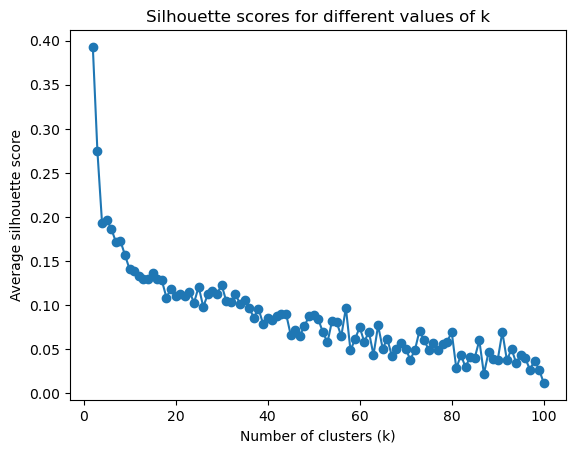

In [39]:
import matplotlib.pyplot as plt

# Generate silhouette scores for different k values
silhouette_scores = []
for k in range(2, 101):
    # Fit the KMeans model with k clusters on the training data
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(x_train)

    # Compute the average silhouette score for the model
    silhouette_scores.append(silhouette_score(x_test, kmeans.predict(x_test)))

# Plot the silhouette scores as a function of k
plt.plot(range(2, 101), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average silhouette score')
plt.title('Silhouette scores for different values of k')
plt.show()

In [40]:
# Find the best k value based on the highest average silhouette score
best_sil = 2 + silhouette_scores.index(max(silhouette_scores))
print(f"The best k value is {best_sil} with a silhouette score of {max(silhouette_scores):.4f}")

The best k value is 2 with a silhouette score of 0.3929


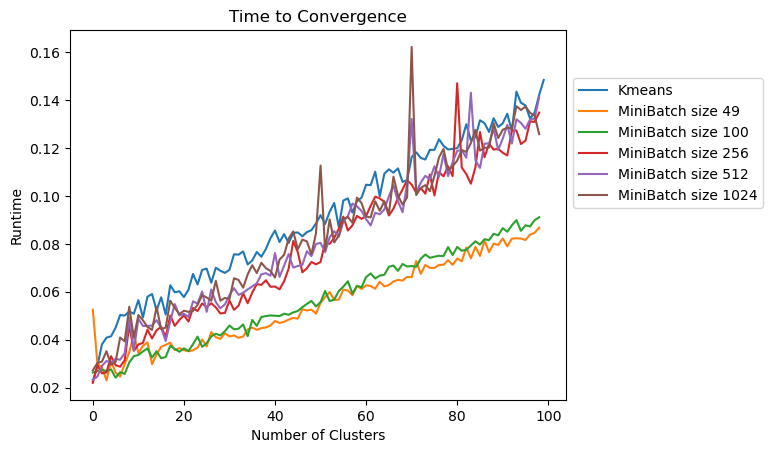

In [41]:
plt.plot(kmeans_times, label="Kmeans")
plt.plot(batch_49, label="MiniBatch size 49")
plt.plot(batch_100, label="MiniBatch size 100")
plt.plot(batch_256, label="MiniBatch size 256")
plt.plot(batch_512, label="MiniBatch size 512")
plt.plot(batch_1024, label="MiniBatch size 1024")
plt.xlabel("Number of Clusters")
plt.ylabel("Runtime")
plt.title("Time to Convergence")
plt.legend(loc='lower left', bbox_to_anchor=(1, 0.5))

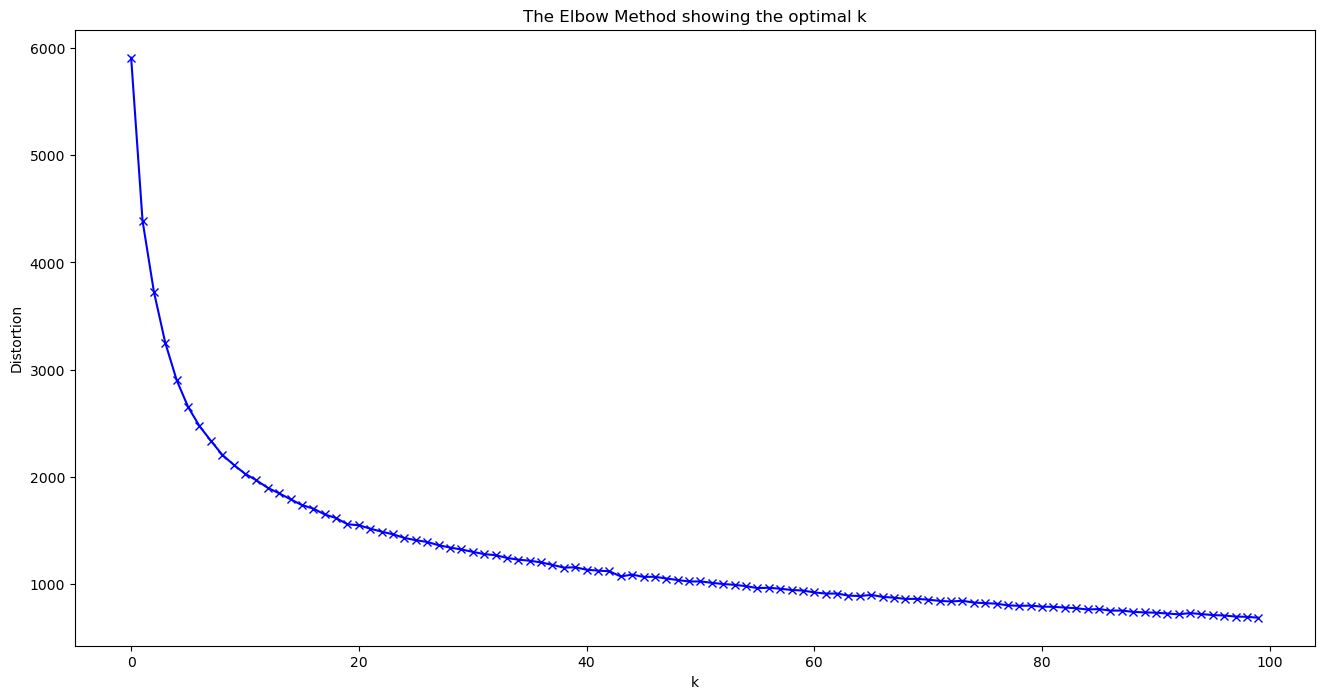

In [42]:
plt.figure(figsize=(16,8))
plt.plot(distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [43]:
best_model = KMeans(n_clusters=best_k, n_init=10, random_state=1).fit(x_train)
test_predictions = best_model.predict(x_test)

In [44]:
labels = best_model.predict(x_train)

cluster0_count = 0
cluster0_indices = []
for index, elem in enumerate(labels):
        if elem == 0:
            cluster0_count += 1
            cluster0_indices.append(index)
            #print(f"0 is found at index {index}")

In [45]:
for index in cluster0_indices:
    print(df["title"][index], "-", df["artist"][index])

Lucid Dreams - Juice WRLD
A Thousand Years - Christina Perri
Knockin' On Heaven's Door - Guns N' Roses
Stole the Show - Kygo
Fine China - Future
Freaky Friday (feat. Chris Brown) - Lil Dicky
Cinderella Man - Eminem
Pretty Girl - Cheat Codes X CADE Remix - Maggie Lindemann
To Be With You - 2010 Remastered Version - Mr. Big
I Remember - Cheat Codes
Rock N Roll - Scorey
BLUE - Tiësto
Tough (feat. Noah Kahan) - Quinn XCII
Seesaw - Ummet Ozcan
They Call Me Tiago (Her Name Is Margo) - Tiagz


In [46]:
cluster1_count = 0
cluster1_indices = []
for index, elem in enumerate(labels):
        if elem == 1:
            cluster1_count += 1
            cluster1_indices.append(index)
            #print(f"0 is found at index {index}")

In [47]:
for index in cluster1_indices:
    print(df["title"][index], "-", df["artist"][index])

STAY (with Justin Bieber) - The Kid LAROI
What's My Age Again? - blink-182
Down - Jay Sean
Nothing's Gonna Stop Us Now - Starship
Never Going Home - Kungs
The Show Goes On - Lupe Fiasco
Mona Lisa (feat. Kendrick Lamar) - Lil Wayne
Drown (feat. Clinton Kane) - Martin Garrix
Donald Trump - Mac Miller
Let Down - Radiohead
Right Now - SR-71
Playinwitme (feat. Kehlani) - KYLE


In [48]:
cluster2_count = 0
cluster2_indices = []
for index, elem in enumerate(labels):
        if elem == 2:
            cluster2_count += 1
            cluster2_indices.append(index)
            #print(f"0 is found at index {index}")

for index in cluster2_indices:
    print(df["top genre"][index])

dance pop
emo rap
dance pop
swedish idol pop
indie pop rap
edm
post-teen pop
edm


In [49]:
cluster8_count = 0
cluster8_indices = []
for index, elem in enumerate(labels):
        if elem == 8:
            cluster8_count += 1
            cluster8_indices.append(index)
            #print(f"0 is found at index {index}")

for index in cluster8_indices:
    print(df["outer genre"][index])

rock
rock
rap
hip hop
ambient
dance
hip hop
rock
pop
hip hop
classical
hip hop


# Upgrade 2 (GMM)

In [50]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture

In [51]:
x=X

In [52]:
x.shape

(1166, 7)

## Train GMM

In [53]:
# Define range of K values to try
k_range = range(1, 101)

# Initialize variables to store best score and corresponding best K
best_score = -np.inf
best_K = None

# Iterate over range of K values and fit GMM for each value
for k in k_range:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(x_train)
    
    # Score GMM on test set
    score = gmm.score(x_test)
    
    # Update best score and corresponding best K if necessary
    if score > best_score:
        best_score = score
        best_K = k

# Print best K value and corresponding score
print(f"Best K value: {best_K}")
print(f"Corresponding score: {best_score}")

Best K value: 8
Corresponding score: -6.8652811864378265


In [54]:
Best_GMM = GaussianMixture(n_components=8, random_state=42).fit(x)
print(Best_GMM.score(x))

-25.90291863843543


In [90]:
# Get the cluster assignments for the data
labels = Best_GMM.predict(x)

# Get the indices of the data points in each cluster
cluster_indices = []
for i in range(8):
    indices = df.index[labels == i]
    cluster_indices.append(indices)

for index in cluster_indices[0]:
    print(df["title"][index], "-", df["artist"][index])

God's Plan - Drake
Lucid Dreams - Juice WRLD
See You Again (feat. Charlie Puth) - Wiz Khalifa
Dile - Don Omar
SAD! - XXXTENTACION
Pa' Que Retozen - Tego Calderón
Going Bad (feat. Drake) - Meek Mill
Stronger - Kanye West
Gold Digger - Kanye West
Run This Town - JAY-Z
Homecoming - Kanye West
Where Is The Love? - Black Eyed Peas
GONE, GONE / THANK YOU - Tyler, The Creator
Danza Kuduro - Don Omar
Runaway - Kanye West
ROCKSTAR (feat. Roddy Ricch) - DaBaby
Go Flex - Post Malone
Taki Taki (with Selena Gomez, Ozuna & Cardi B) - DJ Snake
Killing Me Softly With His Song - Fugees
Lie - NF
Nevermind - Dennis Lloyd
Slow Hands - Niall Horan
Good Life - Kanye West
Stole the Show - Kygo
Let Her Go - Passenger
Beautiful People (feat. Khalid) - Ed Sheeran
No Church In The Wild - JAY-Z
Swervin (feat. 6ix9ine) - A Boogie Wit da Hoodie
6 Foot 7 Foot - Lil Wayne
Me and Julio Down by the Schoolyard - Paul Simon
Through Da Storm - Polo G
Holy (feat. Chance The Rapper) - Justin Bieber
4 Da Gang (with Roddy Ric

In [56]:
from sklearn.decomposition import PCA

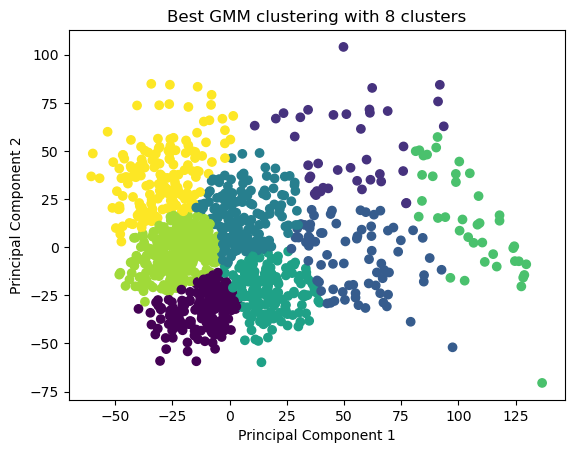

In [57]:
# Apply PCA to reduce data to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)

# Fit best GMM to PCA-transformed data
gmm = GaussianMixture(n_components=8, random_state=42)
gmm.fit(X_pca)

# Plot data points with predicted clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm.predict(X_pca), cmap='viridis')
plt.title(f"Best GMM clustering with {best_K} clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.show()

## Comparing Likelihoods

In [58]:
kmeans = KMeans(n_clusters=95, n_init=10, random_state=42).fit(x_train)
gmm = GaussianMixture(n_components=8, random_state=42).fit(x_train)

In [65]:
from scipy.stats import multivariate_normal

In [82]:
def log_likelihood(kmeans, train_data, test_data):  
    # Compute the log-likelihood of the test set given the K-Means model
    log_likelihood = 0
    for i in range(len(test_data)):
        cluster_id = kmeans.predict(test_data[i].reshape(1, -1))[0]
        cluster_center = kmeans.cluster_centers_[cluster_id]
        dist = np.linalg.norm(test_data[i] - cluster_center) ** 2
        variance = kmeans.inertia_ / train_data.shape[0]
        log_likelihood += multivariate_normal.logpdf(test_data[i], mean=cluster_center, cov=variance)
    return log_likelihood / len(test_data)

In [86]:
print(f"Per-sample average log-likelihood of K-Means: {log_likelihood(kmeans, x_train, x_test):.4f}")
print(f"Per-sample average log-likelihood of GMM: {gmm.score(x_test):.4f}")

Per-sample average log-likelihood of K-Means: -6.6562
Per-sample average log-likelihood of GMM: -6.8653


In [61]:
# Apply PCA to reduce data to 2 components
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

In [62]:
kmeans_pca = KMeans(n_clusters=95, n_init=10, random_state=42).fit(x_pca)

gmm_pca = GaussianMixture(n_components=8, random_state=42).fit(x_pca)

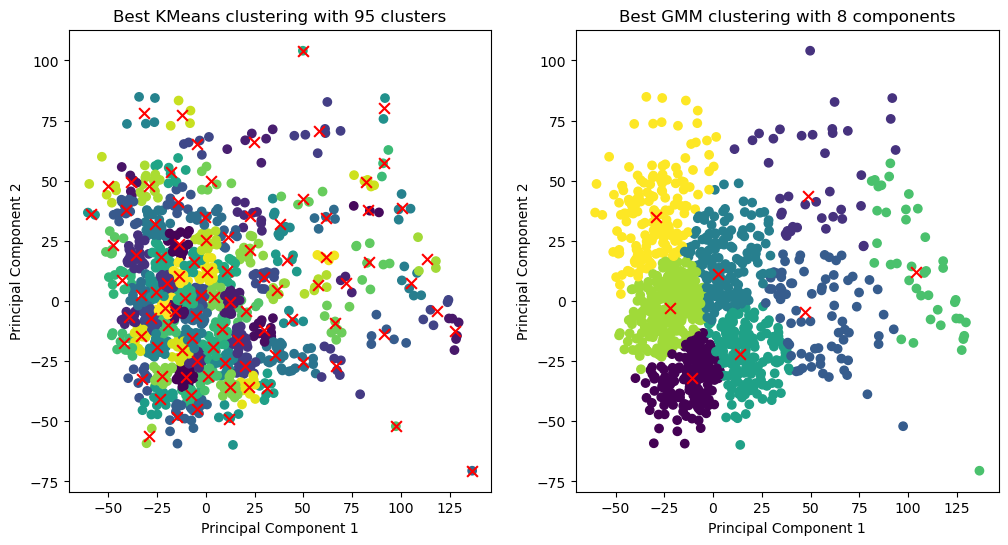

In [63]:
# Create figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot KMeans clusters on the second subplot
axs[0].scatter(x_pca[:, 0], x_pca[:, 1], c=kmeans_pca.predict(x_pca), cmap='viridis')
axs[0].set_title(f"Best KMeans clustering with {95} clusters")
axs[0].set_xlabel("Principal Component 1")
axs[0].set_ylabel("Principal Component 2")

# Plot GMM clusters on the first subplot
axs[1].scatter(x_pca[:, 0], x_pca[:, 1], c=gmm_pca.predict(x_pca), cmap='viridis')
axs[1].set_title(f"Best GMM clustering with {8} components")
axs[1].set_xlabel("Principal Component 1")
axs[1].set_ylabel("Principal Component 2")

# Plot cluster centers as tiny red 'x's
gmm_centers = gmm_pca.means_
axs[1].scatter(gmm_centers[:, 0], gmm_centers[:, 1], marker='x', s=60, c='red')
kmeans_centers = kmeans_pca.cluster_centers_
axs[0].scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], marker='x', s=60, c='red')

# Show the plot
plt.show()

In [64]:
# Calculate per-sample average log-likelihood
distances = kmeans_pca.transform(x_pca)
log_likelihoods = -distances.min(axis=1)
per_sample_avg_log_likelihood = sum(log_likelihoods) / len(x_pca)

print(f"Per-sample average log-likelihood of K-Means: {log_likelihood(X_pca)}")
print(f"Per-sample average log-likelihood of GMM: {gmm_pca.score(X_pca)}")

Per-sample average log-likelihood of K-Means: -3.949370886695805
Per-sample average log-likelihood of GMM: -9.351778128884568
